COMPAS analysis

In [2]:
import pandas as pd
import warnings
import numpy as np
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.mode.chained_assignment = None # muting a trivial warning about PANDAS, don't worry about this
df = pd.read_csv('compas-scores-two-years.csv')
df_cleaned = df.loc[(df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30) 
              & (df['is_recid'] != -1) & (df['c_charge_degree'] != "O") & (df['score_text'] != 'N/A')]
df_filtered = df_cleaned[['age','sex', 'race', 'juv_fel_count', 'decile_score', 'priors_count', 'is_recid', 'is_violent_recid', 
                   'v_decile_score']]
df_final = df_filtered.join(pd.get_dummies(df_filtered['race']))
df_final["sex"] = (df_final["sex"] == "Male") + 0 ## Use the binary coding for sex.

print("Black:", np.sum(df_final['African-American'] == 1))
print("Asian:", np.sum(df_final['Asian'] == 1))
print("White:", np.sum(df_final['Caucasian'] == 1))
print("Hispanic:", np.sum(df_final['Hispanic'] == 1))
print("Native American:", np.sum(df_final['Native American'] == 1))
print("Other:", np.sum(df_final['Other'] == 1))

df_final

Black: 3175
Asian: 31
White: 2103
Hispanic: 509
Native American: 11
Other: 343


,age,sex,race,juv_fel_count,decile_score,priors_count,is_recid,is_violent_recid,v_decile_score,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,69,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
1,34,1,African-American,0,3,0,1,1,1,1,0,0,0,0,0
2,24,1,African-American,0,4,4,1,0,3,1,0,0,0,0,0
5,44,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
6,41,1,Caucasian,0,6,14,1,0,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,23,1,African-American,0,7,0,0,0,5,1,0,0,0,0,0
7210,23,1,African-American,0,3,0,0,0,5,1,0,0,0,0,0
7211,57,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
7212,33,0,African-American,0,2,3,0,0,2,1,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
races = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
columns_to_drop = list(['is_recid', 'is_violent_recid', 'race'] + races)
X = df_final.drop(columns=columns_to_drop)
# df_final_copy = df_final.copy()
# X = df_final_copy.drop(columns=races)
# Y = df_final_copy['is_recid']
Y = df_final['is_recid']
print(X)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=137)

      age  sex  juv_fel_count  decile_score  priors_count  v_decile_score
0      69    1              0             1             0               1
1      34    1              0             3             0               1
2      24    1              0             4             4               3
5      44    1              0             1             0               1
6      41    1              0             6            14               2
...   ...  ...            ...           ...           ...             ...
7209   23    1              0             7             0               5
7210   23    1              0             3             0               5
7211   57    1              0             1             0               1
7212   33    0              0             2             3               2
7213   23    0              0             4             2               4

[6172 rows x 6 columns]


In [255]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x, train_y)

LogisticRegression(max_iter=5000)

In [256]:
from sklearn import metrics
lr_prediction = logistic_regression.predict(test_x)
accuracy = metrics.accuracy_score(test_y, lr_prediction)
percent_accuracy = accuracy * 100
percent_accuracy

68.98785425101215

1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235


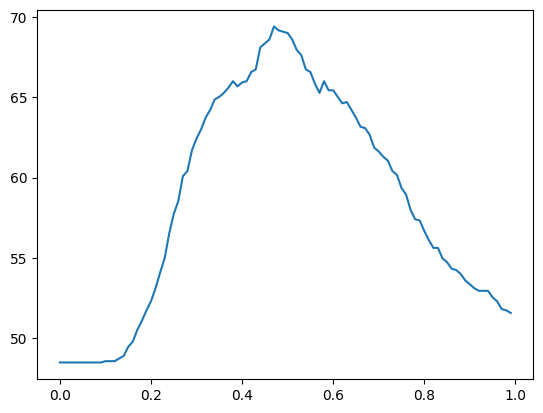

In [257]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

thresholds = list()
accuracies = list()
best_threshold = 0
best_accuracy = 0


for i in range(100):
    preds = np.where(logistic_regression.predict_proba(test_x)[:,1] > i /100, 1, 0)
    # preds = np.where(True, logistic_regression.predict_proba(test_x)[:,1] > i / 100 and 1, 0)
    print(preds.size, test_y.size)
    # preds = np.where(logistic_regression.predict_proba(test_x)[:,])
    # accuracy = metrics.accuracy_score(Y, preds)
    accuracy = np.sum(preds == test_y) / len(preds) * 100
    if accuracy > best_accuracy:
        best_threshold = i / 100
        best_accuracy = accuracy
    accuracies.append(np.sum(preds == test_y) / len(preds) * 100)
    # accuracies.append(np.count_nonzero(preds == 0) / len(preds) * 100)
    thresholds.append(i / 100)

    
print(best_threshold, best_accuracy)
plt.plot(thresholds, accuracies)

Binary Race

In [258]:
races = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

print(df_final)

X = df_final[(df_final['African-American'] == 1) | (df_final['Caucasian'] == 1)]
# print()
# X = df_final.drop(df_final['Asian'] == 1)
# X = X.drop(X['Hispanic'] == 1)
# X = X.drop(X['Native American'] == 1)
# X = X.drop(X['Other'] == 1)
Y = X['is_recid']
X = X.drop(columns=list(['is_recid', 'is_violent_recid', 'race'] + races))

print(X)
print(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=137)

      age  sex              race  juv_fel_count  decile_score  priors_count  \
0      69    1             Other              0             1             0   
1      34    1  African-American              0             3             0   
2      24    1  African-American              0             4             4   
5      44    1             Other              0             1             0   
6      41    1         Caucasian              0             6            14   
...   ...  ...               ...            ...           ...           ...   
7209   23    1  African-American              0             7             0   
7210   23    1  African-American              0             3             0   
7211   57    1             Other              0             1             0   
7212   33    0  African-American              0             2             3   
7213   23    0          Hispanic              0             4             2   

      is_recid  is_violent_recid  v_decile_score  A

1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056


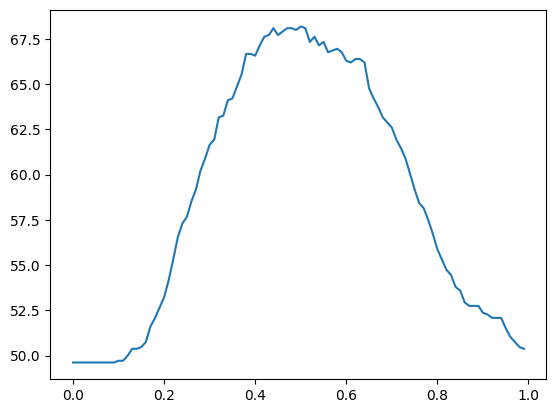

In [259]:
thresholds = list()
accuracies = list()
best_threshold = 0
best_accuracy = 0


for i in range(100):
    preds = np.where(logistic_regression.predict_proba(test_x)[:,1] > i /100, 1, 0)
    # preds = np.where(True, logistic_regression.predict_proba(test_x)[:,1] > i / 100 and 1, 0)
    print(preds.size, test_y.size)
    # preds = np.where(logistic_regression.predict_proba(test_x)[:,])
    # accuracy = metrics.accuracy_score(Y, preds)
    accuracy = np.sum(preds == test_y) / len(preds) * 100
    if accuracy > best_accuracy:
        best_threshold = i / 100
        best_accuracy = accuracy
    accuracies.append(np.sum(preds == test_y) / len(preds) * 100)
    # accuracies.append(np.count_nonzero(preds == 0) / len(preds) * 100)
    thresholds.append(i / 100)

    
print(best_threshold, best_accuracy)
plt.plot(thresholds, accuracies)

Analysis by race

In [13]:
X_aa = df_final[(df_final['African-American'] == 1)]
Y_aa = X_aa['is_recid']
X_aa = X_aa.drop(columns=columns_to_drop)

X_c = df_final[df_final['Caucasian'] == 1]
Y_c = X_c['is_recid']
X_c = X_c.drop(columns=columns_to_drop)

X_na = df_final[df_final['Native American'] == 1]
Y_na = X_na['is_recid']
X_na = X_na.drop(columns=columns_to_drop)

X_h = df_final[df_final['Hispanic'] == 1]
Y_h = X_h['is_recid']
X_h = X_h.drop(columns=columns_to_drop)

X_a = df_final[df_final['Asian'] == 1]
Y_a = X_a['is_recid']
X_a = X_a.drop(columns=columns_to_drop)

X_o = df_final[df_final['Other'] == 1]
Y_o = X_o['is_recid']
X_o = X_o.drop(columns=columns_to_drop)

train_x_aa, test_x_aa, train_y_aa, test_y_aa = train_test_split(X_aa, Y_aa, test_size=0.2, random_state=137)
train_x_c, test_x_c, train_y_c, test_y_c = train_test_split(X_c, Y_c, test_size=0.2, random_state=137)
train_x_a, test_x_a, train_y_a, test_y_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=137)
train_x_h, test_x_h, train_y_h, test_y_h = train_test_split(X_h, Y_h, test_size=0.2, random_state=137)
train_x_o, test_x_o, train_y_o, test_y_o = train_test_split(X_o, Y_o, test_size=0.2, random_state=137)
train_x_na, test_x_na, train_y_na, test_y_na = train_test_split(X_na, Y_na, test_size=0.2, random_state=137)
test_x_all = pd.concat([test_x_a, test_x_aa, test_x_c, test_x_h, test_x_na, test_x_o])
test_y_all = pd.concat([test_y_a, test_y_aa, test_y_c, test_y_h, test_y_na, test_y_o])
train_x_all = pd.concat((train_x_aa, train_x_c, train_x_a, train_x_h, train_x_o, train_x_na))
train_y_all = pd.concat((train_y_aa, train_y_c, train_y_a, train_y_h, train_y_o, train_y_na))
train_x = pd.concat((train_x_aa, train_x_c), axis=0)
train_y = pd.concat((train_y_aa, train_y_c), axis=0)
test_x = pd.concat((test_x_aa, test_x_c), axis=0)
test_y = pd.concat((test_y_aa, test_y_c), axis=0)

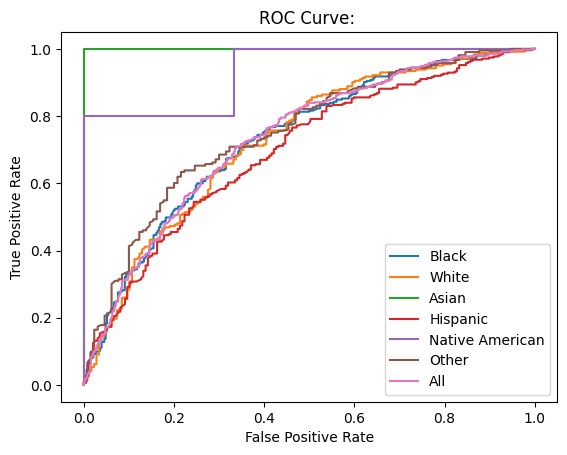

In [261]:
def make_graph(logistic_regression, title=""):
    black_tpr_list, black_fpr_list, black_thresholds = metrics.roc_curve(test_y_aa, logistic_regression.predict_proba(test_x_aa)[:,0])
    white_tpr_list, white_fpr_list, white_thresholds = metrics.roc_curve(test_y_c, logistic_regression.predict_proba(test_x_c)[:,0])
    a_tpr_list, a_fpr_list, a_thresholds = metrics.roc_curve(test_y_a, logistic_regression.predict_proba(test_x_a)[:,0])
    h_tpr_list, h_fpr_list, h_thresholds = metrics.roc_curve(Y_h, logistic_regression.predict_proba(X_h)[:,0])
    o_tpr_list, o_fpr_list, o_thresholds = metrics.roc_curve(Y_o, logistic_regression.predict_proba(X_o)[:,0])
    na_tpr_list, na_fpr_list, na_thresholds = metrics.roc_curve(Y_na, logistic_regression.predict_proba(X_na)[:,0])

    all_tpr_list, all_fpr_list, all_thresholds = metrics.roc_curve(test_y, logistic_regression.predict_proba(test_x)[:,0])


    plt.plot(black_fpr_list, black_tpr_list, label='Black')
    plt.plot(white_fpr_list, white_tpr_list, label='White')
    plt.plot(a_fpr_list, a_tpr_list, label='Asian')
    plt.plot(h_fpr_list, h_tpr_list, label='Hispanic')
    plt.plot(na_fpr_list, na_tpr_list, label='Native American')
    plt.plot(o_fpr_list, o_tpr_list, label='Other')
    plt.plot(all_fpr_list, all_tpr_list, label='All')
    plt.title(f'ROC Curve: {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
make_graph(logistic_regression)

0.5 68.4659090909091


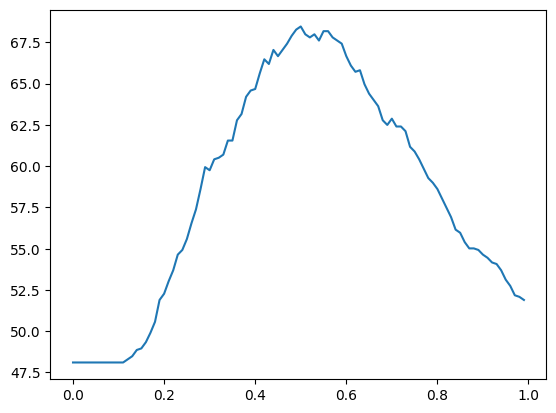

In [262]:
thresholds = list()
accuracies = list()
best_threshold = 0
best_accuracy = 0


for i in range(100):
    preds = np.where(logistic_regression.predict_proba(test_x)[:,1] > i /100, 1, 0)
    accuracy = np.sum(preds == test_y) / len(preds) * 100
    if accuracy > best_accuracy:
        best_threshold = i / 100
        best_accuracy = accuracy
    accuracies.append(np.sum(preds == test_y) / len(preds) * 100)
    thresholds.append(i / 100)

    
print(best_threshold, best_accuracy)
plt.plot(thresholds, accuracies)

In [263]:
def calc_accuracy(logistic_regression, test_x, test_y):
    lr_prediction = logistic_regression.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, lr_prediction)
    return accuracy * 100

print(calc_accuracy(logistic_regression, test_x_aa, test_y_aa))
print(calc_accuracy(logistic_regression, test_x_c, test_y_c))

67.40157480314961
70.07125890736341


ROC Graph for all races trained only on Black and White

In [22]:
def print_tpr_all(model, test_x_trained, test_y_trained):
    pred_y_a = model.predict(test_x_a)
    tpr_a = np.sum((pred_y_a == test_y_a) & (test_y_a == 1)) / np.sum(test_y_a == 1)
    fpr_a = np.sum((pred_y_a != test_y_a) & (test_y_a == 0)) / np.sum(test_y_a == 0)
    ppv_a = np.sum((pred_y_a == test_y_a) & (pred_y_a == 1)) / np.sum(pred_y_a == 1)
    tnr_a = np.sum((pred_y_a == test_y_a) & (test_y_a == 0)) / np.sum(test_y_a == 0)
    fnr_a = np.sum((pred_y_a != test_y_a) & (test_y_a == 1)) / np.sum(test_y_a == 1)
    npv_a = np.sum((pred_y_a == test_y_a) & (pred_y_a == 0)) / np.sum(pred_y_a == 0)
    acc_a = np.sum((pred_y_a == test_y_a)) / len(pred_y_a)

    pred_y_aa = model.predict(test_x_aa)
    tpr_aa = np.sum((pred_y_aa == test_y_aa) & (test_y_aa == 1)) / np.sum(test_y_aa == 1)
    fpr_aa = np.sum((pred_y_aa != test_y_aa) & (test_y_aa == 0)) / np.sum(test_y_aa == 0)
    ppv_aa = np.sum((pred_y_aa == test_y_aa) & (pred_y_aa == 1)) / np.sum(pred_y_aa == 1)
    tnr_aa = np.sum((pred_y_aa == test_y_aa) & (test_y_aa == 0)) / np.sum(test_y_aa == 0)
    fnr_aa = np.sum((pred_y_aa != test_y_aa) & (test_y_aa == 1)) / np.sum(test_y_aa == 1)
    npv_aa = np.sum((pred_y_aa == test_y_aa) & (pred_y_aa == 0)) / np.sum(pred_y_aa == 0)
    acc_aa = np.sum((pred_y_aa == test_y_aa)) / len(pred_y_aa)


    pred_y_h = model.predict(test_x_h)
    tpr_h = np.sum((pred_y_h == test_y_h) & (test_y_h == 1)) / np.sum(test_y_h == 1)
    fpr_h = np.sum((pred_y_h != test_y_h) & (test_y_h == 0)) / np.sum(test_y_h == 0)
    ppv_h = np.sum((pred_y_h == test_y_h) & (pred_y_h == 1)) / np.sum(pred_y_h == 1)
    tnr_h = np.sum((pred_y_h == test_y_h) & (test_y_h == 0)) / np.sum(test_y_h == 0)
    fnr_h = np.sum((pred_y_h != test_y_h) & (test_y_h == 1)) / np.sum(test_y_h == 1)
    npv_h = np.sum((pred_y_h == test_y_h) & (pred_y_h == 0)) / np.sum(pred_y_h == 0)
    acc_h = np.sum((pred_y_h == test_y_h)) / len(pred_y_h)


    pred_y_na = model.predict(test_x_na)
    tpr_na = np.sum((pred_y_na == test_y_na) & (test_y_na == 1)) / np.sum(test_y_na == 1)
    fpr_na = np.sum((pred_y_na != test_y_na) & (test_y_na == 0)) / np.sum(test_y_na == 0)
    ppv_na = np.sum((pred_y_na == test_y_na) & (pred_y_na == 1)) / np.sum(pred_y_na == 1)
    tnr_na = np.sum((pred_y_na == test_y_na) & (test_y_na == 0)) / np.sum(test_y_na == 0)
    fnr_na = np.sum((pred_y_na != test_y_na) & (test_y_na == 1)) / np.sum(test_y_na == 1)
    npv_na = np.sum((pred_y_na == test_y_na) & (pred_y_na == 0)) / np.sum(pred_y_na == 0)
    acc_na = np.sum((pred_y_na == test_y_na)) / len(pred_y_na)


    pred_y_o = model.predict(test_x_o)
    tpr_o = np.sum((pred_y_o == test_y_o) & (test_y_o == 1)) / np.sum(test_y_o == 1)
    fpr_o = np.sum((pred_y_o != test_y_o) & (test_y_o == 0)) / np.sum(test_y_o == 0)
    ppv_o = np.sum((pred_y_o == test_y_o) & (pred_y_o == 1)) / np.sum(pred_y_o == 1)
    tnr_o = np.sum((pred_y_o == test_y_o) & (test_y_o == 0)) / np.sum(test_y_o == 0)
    fnr_o = np.sum((pred_y_o != test_y_o) & (test_y_o == 1)) / np.sum(test_y_o == 1)
    npv_o = np.sum((pred_y_o == test_y_o) & (pred_y_o == 0)) / np.sum(pred_y_o == 0)
    acc_o = np.sum((pred_y_o == test_y_o)) / len(pred_y_o)

    pred_y_c = model.predict(test_x_c)
    tpr_c = np.sum((pred_y_c == test_y_c) & (test_y_c == 1)) / np.sum(test_y_c == 1)
    fpr_c = np.sum((pred_y_c != test_y_c) & (test_y_c == 0)) / np.sum(test_y_c == 0)
    ppv_c = np.sum((pred_y_c == test_y_c) & (pred_y_c == 1)) / np.sum(pred_y_c == 1)
    tnr_c = np.sum((pred_y_c == test_y_c) & (test_y_c == 0)) / np.sum(test_y_c == 0)
    fnr_c = np.sum((pred_y_c != test_y_c) & (test_y_c == 1)) / np.sum(test_y_c == 1)
    npv_c = np.sum((pred_y_c == test_y_c) & (pred_y_c == 0)) / np.sum(pred_y_c == 0)
    acc_c = np.sum((pred_y_c == test_y_c)) / len(pred_y_c)
    
    pred_y_all = model.predict(test_x_all)
    tpr_all = np.sum((pred_y_all == test_y_all) & (test_y_all == 1)) / np.sum(test_y_all == 1)
    fpr_all = np.sum((pred_y_all != test_y_all) & (test_y_all == 0)) / np.sum(test_y_all == 0)
    ppv_all = np.sum((pred_y_all == test_y_all) & (pred_y_all == 1)) / np.sum(pred_y_all == 1)
    tnr_all = np.sum((pred_y_all == test_y_all) & (test_y_all == 0)) / np.sum(test_y_all == 0)
    fnr_all = np.sum((pred_y_all != test_y_all) & (test_y_all == 1)) / np.sum(test_y_all == 1)
    npv_all = np.sum((pred_y_all == test_y_all) & (pred_y_all == 0)) / np.sum(pred_y_all == 0)
    acc_all = np.sum((pred_y_all == test_y_all)) / len(pred_y_all)


    pred_y_trained = model.predict(test_x_trained)
    tpr_trained = np.sum((pred_y_trained == test_y_trained) & (test_y_trained == 1)) / np.sum(test_y_trained == 1)
    fpr_trained = np.sum((pred_y_trained != test_y_trained) & (test_y_trained == 0)) / np.sum(test_y_trained == 0)
    ppv_trained = np.sum((pred_y_trained == test_y_trained) & (pred_y_trained == 1)) / np.sum(pred_y_trained == 1)
    tnr_trained = np.sum((pred_y_trained == test_y_trained) & (test_y_trained == 0)) / np.sum(test_y_trained == 0)
    fnr_trained = np.sum((pred_y_trained != test_y_trained) & (test_y_trained == 1)) / np.sum(test_y_trained == 1)
    npv_trained = np.sum((pred_y_trained == test_y_trained) & (pred_y_trained == 0)) / np.sum(pred_y_trained == 0)
    acc_trained = np.sum((pred_y_trained == test_y_trained)) / len(pred_y_trained)

    print(f"TPR & {round(tpr_a * 100, 1)} & {round(tpr_aa * 100, 1)} & {round(tpr_h * 100, 1)} & {round(tpr_na * 100, 1)} & {round(tpr_o * 100, 1)} & {round(tpr_c * 100, 1)} & {round(tpr_all * 100, 1)} & {round(tpr_trained * 100, 1)} \\\\")
    print(f"FPR & {round(fpr_a * 100, 1)} & {round(fpr_aa * 100, 1)} & {round(fpr_h * 100, 1)} & {round(fpr_na * 100, 1)} & {round(fpr_o * 100, 1)} & {round(fpr_c * 100, 1)} & {round(fpr_all * 100, 1)} & {round(fpr_trained * 100, 1)} \\\\")
    print(f"PPV & {round(ppv_a * 100, 1)} & {round(ppv_aa * 100, 1)} & {round(ppv_h * 100, 1)} & {round(ppv_na * 100, 1)} & {round(ppv_o * 100, 1)} & {round(ppv_c * 100, 1)} & {round(ppv_all * 100, 1)} & {round(ppv_trained * 100, 1)} \\\\")
    print(f"1 - PPV & {round((1 - ppv_a) * 100, 1)} & {round((1 - ppv_aa) * 100, 1)} & {round((1 - ppv_h) * 100, 1)} & {round((1 - ppv_na) * 100, 1)} & {round((1 - ppv_o) * 100, 1)} & {round((1 - ppv_c) * 100, 1)} & {round((1 - ppv_all) * 100, 1)} & {round((1 - ppv_trained) * 100, 1)} \\\\")
    # print(f"TNR & {tnr_a} & {tnr_aa} & {tnr_h} & {tnr_na} & {tnr_o} & {tnr_c} & {tnr_all} & {tnr_trained} \\\\")
    # print(f"FNR & {fnr_a} & {fnr_aa} & {fnr_h} & {fnr_na} & {fnr_o} & {fnr_c} & {fnr_all} & {fnr_trained} \\\\")
    # print(f"NPV & {npv_a} & {npv_aa} & {npv_h} & {npv_na} & {npv_o} & {npv_c} & {npv_all} & {npv_trained} \\\\")
    print(f"Acc & {round(acc_a * 100, 1)} & {round(acc_aa * 100, 1)} & {round(acc_h * 100, 1)} & {round(acc_na * 100, 1)} & {round(acc_o * 100, 1)} & {round(acc_c * 100, 1)} & {round(acc_all * 100, 1)} & {round(acc_trained * 100, 1)} \\\\")


    
logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x, train_y)

test_x_groups_trained = pd.concat([test_x_aa, test_x_c])
test_y_groups_trained = pd.concat([test_y_aa, test_y_c])
print_tpr_all(logistic_regression, test_x_groups_trained, test_y_groups_trained)


np_random = np.random.choice(len(train_x_aa), size=len(train_x_c), replace=False)
train_x_eq = pd.concat([train_x_aa.iloc[np_random], train_x_c])
train_y_eq = pd.concat([train_y_aa.iloc[np_random], train_y_c])
logistic_regression.fit(train_x_eq, train_y_eq)

print_tpr_all(logistic_regression, test_x_groups_trained, test_y_groups_trained)
# make_graph(logistic_regression, 'black/white')




TPR & 100.0 & 74.2 & 44.4 & 100.0 & 46.4 & 51.7 & 63.9 & 66.3 \\
FPR & 0.0 & 41.0 & 22.8 & 0.0 & 24.4 & 15.6 & 28.5 & 29.7 \\
PPV & 100.0 & 66.2 & 60.6 & 100.0 & 56.5 & 70.8 & 66.8 & 67.4 \\
1 - PPV & 0.0 & 33.8 & 39.4 & 0.0 & 43.5 & 29.2 & 33.2 & 32.6 \\
Acc & 100.0 & 66.9 & 62.7 & 100.0 & 63.8 & 70.5 & 67.9 & 68.4 \\
TPR & 100.0 & 74.5 & 42.2 & 100.0 & 42.9 & 50.6 & 63.4 & 66.1 \\
FPR & 0.0 & 40.0 & 22.8 & 0.0 & 24.4 & 16.0 & 28.2 & 29.4 \\
PPV & 100.0 & 66.8 & 59.4 & 100.0 & 54.5 & 69.8 & 66.8 & 67.6 \\
1 - PPV & 0.0 & 33.2 & 40.6 & 0.0 & 45.5 & 30.2 & 33.2 & 32.4 \\
Acc & 100.0 & 67.6 & 61.8 & 100.0 & 62.3 & 69.8 & 67.8 & 68.5 \\


In [23]:
logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x_all, train_y_all)
# test_x_all = pd.concat([test_x_aa, test_x_a, test_x_c, test_x_h, test_x_na, test_x_o])
# test_y_all = pd.concat([test_y_aa, 
                        # t])
print_tpr_all(logistic_regression, test_x_trained=test_x_all, test_y_trained=test_y_all)

TPR & 100.0 & 73.6 & 42.2 & 100.0 & 42.9 & 50.6 & 62.9 & 62.9 \\
FPR & 0.0 & 39.7 & 22.8 & 0.0 & 24.4 & 15.2 & 27.8 & 27.8 \\
PPV & 100.0 & 66.8 & 59.4 & 100.0 & 54.5 & 70.9 & 67.0 & 67.0 \\
1 - PPV & 0.0 & 33.2 & 40.6 & 0.0 & 45.5 & 29.1 & 33.0 & 33.0 \\
Acc & 100.0 & 67.2 & 61.8 & 100.0 & 62.3 & 70.3 & 67.8 & 67.8 \\


In [28]:


# white/non-white where non-white is hispanic
train_x_wh = pd.concat([train_x_c, train_x_h, train_x_o])
train_y_wh = pd.concat([train_y_c, train_y_h, train_y_o])
test_x_groups_trained_wh = pd.concat([test_x_h, test_x_c, test_x_o])
test_y_groups_trained_wh = pd.concat([test_y_h, test_y_c, test_y_o])

logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x_wh, train_y_wh)
print_tpr_all(logistic_regression, test_x_groups_trained_wh, test_y_groups_trained_wh)
# make_graph(logistic_regression, 'white/non-white -> hispanic + other')


TPR & 100.0 & 71.8 & 35.6 & 100.0 & 42.9 & 44.4 & 59.5 & 42.6 \\
FPR & 0.0 & 35.1 & 15.8 & 0.0 & 19.5 & 14.4 & 24.4 & 15.2 \\
PPV & 100.0 & 68.9 & 64.0 & 100.0 & 60.0 & 69.3 & 68.6 & 67.3 \\
1 - PPV & 0.0 & 31.1 & 36.0 & 0.0 & 40.0 & 30.7 & 31.4 & 32.7 \\
Acc & 100.0 & 68.5 & 62.7 & 100.0 & 65.2 & 68.2 & 68.0 & 66.9 \\


In [29]:


# white/non-white where non-white is hispanic
train_x_wh = pd.concat([train_x_c, train_x_h])#, train_x_o])
train_y_wh = pd.concat([train_y_c, train_y_h])#, train_y_o])
test_x_groups_trained_wh = pd.concat([test_x_h, test_x_c])#, test_x_o])
test_y_groups_trained_wh = pd.concat([test_y_h, test_y_c])#, test_y_o])

logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x_wh, train_y_wh)
print_tpr_all(logistic_regression, test_x_groups_trained_wh, test_y_groups_trained_wh)
# make_graph(logistic_regression, 'white/non-white -> hispanic')


TPR & 100.0 & 69.7 & 35.6 & 100.0 & 35.7 & 44.4 & 57.9 & 42.6 \\
FPR & 0.0 & 34.8 & 15.8 & 0.0 & 19.5 & 12.3 & 23.5 & 13.0 \\
PPV & 100.0 & 68.5 & 64.0 & 100.0 & 55.6 & 72.5 & 68.9 & 70.9 \\
1 - PPV & 0.0 & 31.5 & 36.0 & 0.0 & 44.4 & 27.5 & 31.1 & 29.1 \\
Acc & 100.0 & 67.6 & 62.7 & 100.0 & 62.3 & 69.4 & 67.7 & 68.1 \\


In [25]:


# black/non-black where non-black is hispanic
train_x_wh = pd.concat([train_x_aa, train_x_h, train_x_o])
train_y_wh = pd.concat([train_y_aa, train_y_h, train_y_o])
test_x_groups_trained_wh = pd.concat([test_x_h, test_x_aa, test_x_o])
test_y_groups_trained_wh = pd.concat([test_y_h, test_y_aa, test_y_o])

logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x_wh, train_y_wh)
print_tpr_all(logistic_regression, test_x_groups_trained_wh, test_y_groups_trained_wh)
# make_graph(logistic_regression, 'black/non-black -> hispanic + other')



TPR & 100.0 & 73.6 & 46.7 & 100.0 & 50.0 & 49.4 & 63.2 & 69.0 \\
FPR & 0.0 & 41.3 & 21.1 & 0.0 & 24.4 & 16.5 & 28.8 & 36.7 \\
PPV & 100.0 & 65.9 & 63.6 & 100.0 & 58.3 & 68.8 & 66.3 & 65.3 \\
1 - PPV & 0.0 & 34.1 & 36.4 & 0.0 & 41.7 & 31.2 & 33.7 & 34.7 \\
Acc & 100.0 & 66.5 & 64.7 & 100.0 & 65.2 & 69.1 & 67.4 & 66.1 \\


In [26]:

# black/non-black where non-black is hispanic
train_x_wh = pd.concat([train_x_aa, train_x_h])#, train_x_o])
train_y_wh = pd.concat([train_y_aa, train_y_h])#, train_y_o])
test_x_groups_trained_wh  = pd.concat([test_x_h, test_x_aa])#, test_x_o])
test_y_groups_trained_wh = pd.concat([test_y_h, test_y_aa])#, test_y_o])

print(train_x_aa)
logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x_wh, train_y_wh)
print_tpr_all(logistic_regression, test_x_groups_trained_wh, test_y_groups_trained_wh)
# make_graph(logistic_regression, 'black/non-black -> hispanic')


      age  sex  juv_fel_count  decile_score  priors_count  v_decile_score
732    48    1              0             6             2               1
2963   24    1              0             3             5               4
2377   24    1              0             6             4               6
4266   35    0              0             3             5               3
3106   25    1              0             9            21               9
...   ...  ...            ...           ...           ...             ...
2919   30    1              0             4             5               6
2703   28    0              0             5             3               4
1387   26    1              0             3             3               3
5324   27    1              0             5             2               3
6362   26    1              0             4             2               3

[2540 rows x 6 columns]
TPR & 100.0 & 73.9 & 46.7 & 100.0 & 50.0 & 50.0 & 63.6 & 70.7 \\
FPR & 0.0 & 41.6 & 21.

In [ ]:
def make_graph(logistic_regression, title=""):
    aa_logistic_regression = LogisticRegression(max_iter=5000)
    b_w_logistic_regression = LogisticRegression(max_iter=5000)

    
    
    aa_logistic_regression.fit(train_x_aa, train_y_aa)
    black_tpr_list, black_fpr_list, black_thresholds = metrics.roc_curve(test_y_aa, logistic_regression.predict_proba(test_x_aa)[:,0])
    white_tpr_list, white_fpr_list, white_thresholds = metrics.roc_curve(test_y_c, logistic_regression.predict_proba(test_x_c)[:,0])
    a_tpr_list, a_fpr_list, a_thresholds = metrics.roc_curve(test_y_a, logistic_regression.predict_proba(test_x_a)[:,0])
    h_tpr_list, h_fpr_list, h_thresholds = metrics.roc_curve(Y_h, logistic_regression.predict_proba(X_h)[:,0])
    o_tpr_list, o_fpr_list, o_thresholds = metrics.roc_curve(Y_o, logistic_regression.predict_proba(X_o)[:,0])
    na_tpr_list, na_fpr_list, na_thresholds = metrics.roc_curve(Y_na, logistic_regression.predict_proba(X_na)[:,0])

    all_tpr_list, all_fpr_list, all_thresholds = metrics.roc_curve(test_y, logistic_regression.predict_proba(test_x)[:,0])


    plt.plot(black_fpr_list, black_tpr_list, label='Black')
    plt.plot(white_fpr_list, white_tpr_list, label='White')
    plt.plot(a_fpr_list, a_tpr_list, label='Asian')
    plt.plot(h_fpr_list, h_tpr_list, label='Hispanic')
    plt.plot(na_fpr_list, na_tpr_list, label='Native American')
    plt.plot(o_fpr_list, o_tpr_list, label='Other')
    plt.plot(all_fpr_list, all_tpr_list, label='All')
    plt.title(f'ROC Curve: {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

In [268]:
np_random = np.random.choice(len(train_x_aa), size=len(train_x_c), replace=False)
print(train_x_aa.iloc[np_random])
print(train_y_aa.iloc[np_random])

      age  sex  juv_fel_count  decile_score  priors_count  v_decile_score
7169   22    1              0             5             0               7
1939   27    1              0             1             1               2
567    27    1              0             4             5               9
6094   24    1              0             7             8               7
5826   29    1              0             3             7               2
...   ...  ...            ...           ...           ...             ...
7172   61    1              0             9             4               3
5186   32    1              0             5             3               2
2412   50    1              0             5             1               5
2133   27    1              0             2             0               3
4172   29    1              0            10             7               9

[1682 rows x 6 columns]
7169    1
1939    0
567     1
6094    1
5826    1
       ..
7172    1
5186    1
2412   

ROC Curve 